# HandWritten Digit Classifications

### MNIST DATASET

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 16s 1us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

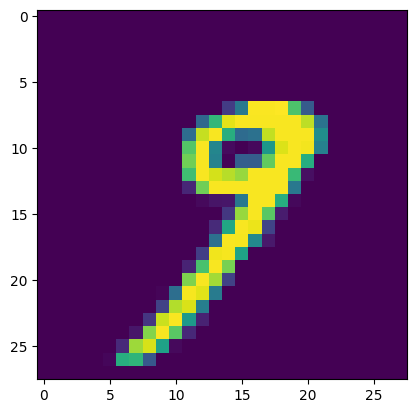

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[33])

In [13]:
X_train = x_train/255
X_test = x_test/255

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # input layer
model.add(Dense(128, activation='relu')) # hidden layer
model.add(Dense(64, activation='relu')) # hidden layer
model.add(Dense(32, activation='relu')) # hidden layer
model.add(Dense(10, activation='softmax')) # output layer


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4665 - accuracy: 0.8624 - val_loss: 0.3524 - val_accuracy: 0.8969
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3442 - accuracy: 0.8981 - val_loss: 0.3013 - val_accuracy: 0.9097
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2878 - accuracy: 0.9144 - val_loss: 0.2875 - val_accuracy: 0.9185
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2473 - accuracy: 0.9259 - val_loss: 0.2315 - val_accuracy: 0.9323
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2157 - accuracy: 0.9353 - val_loss: 0.1985 - val_accuracy: 0.9416
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1891 - accuracy: 0.9435 - val_loss: 0.1882 - val_accuracy: 0.9480
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1665 - accuracy: 0.9501 - val_loss: 0.1681 - val_accuracy:

In [28]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [29]:
y_Pred = y_prob.argmax(axis=1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Pred)

0.9649

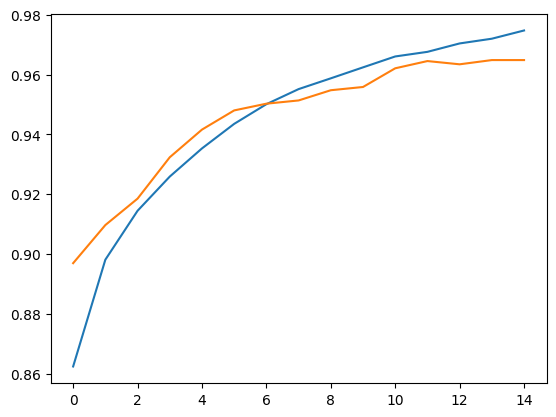

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

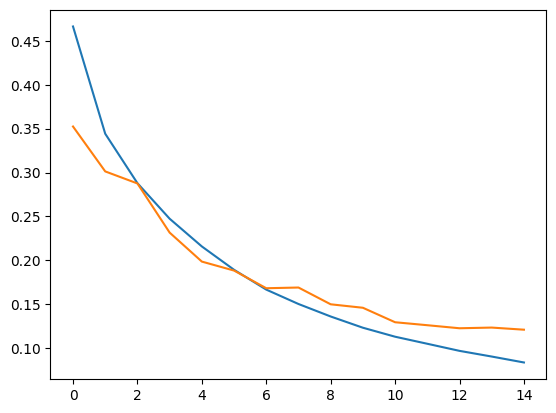

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

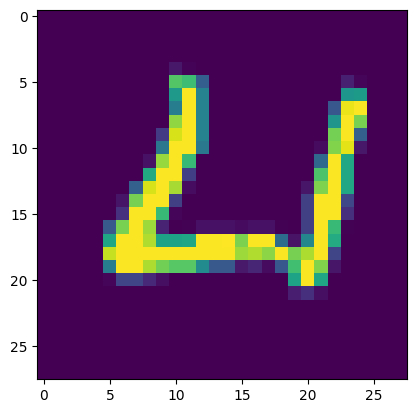

In [35]:
plt.imshow(x_test[33])

In [36]:
model.predict(X_test[33].reshape(1, 28, 28)).argmax()

1/1 [==============================] - 0s 40ms/step


4